In [1]:
import os
import pandas as pd

# Obtenir le répertoire courant
current_directory = os.getcwd()

# Créer le chemin complet vers le fichier CSV
file_path = os.path.join(current_directory, 'DisneylandReviews.csv')

# Charger le fichier CSV dans un DataFrame pandas en spécifiant un encodage
df = pd.read_csv(file_path, encoding='latin1')

# Afficher les premières lignes du DataFrame
df.head()


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [2]:
# Convertir 'rating' en catégories de sentiment
def convert_rating_to_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['Rating'].apply(convert_rating_to_sentiment)

In [3]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,positive
...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,positive
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,positive
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,positive
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,positive


In [4]:
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer  # Correction ici (Text -> text)
from sklearn.model_selection import train_test_split  # Correction ici (sklear -> sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [8]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
# DATA PROCESSING

In [15]:
df.shape

(42656, 7)

In [17]:
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
sentiment            0
dtype: int64

In [19]:
#distribution de la variable sentiment
df['sentiment'].value_counts()

sentiment
positive    33921
neutral      5109
negative     3626
Name: count, dtype: int64

In [25]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 682.7 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/301.2 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


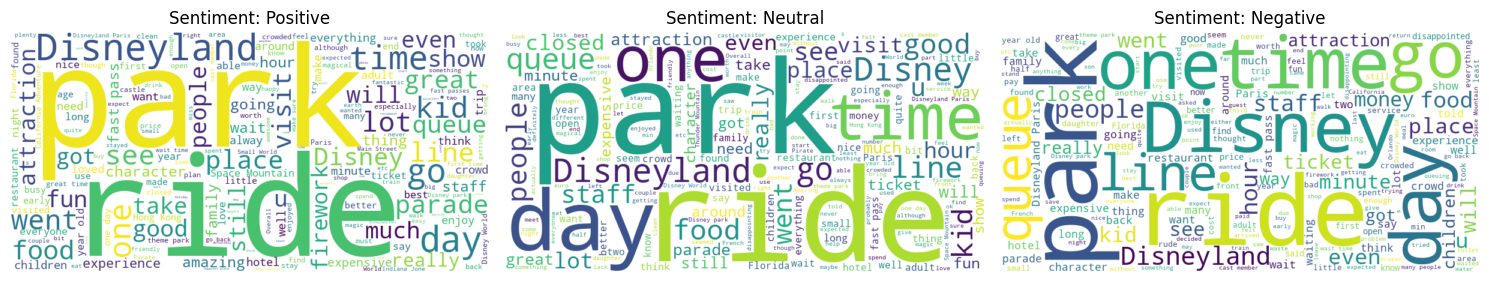

In [28]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fonction pour générer un nuage de mots pour chaque sentiment
def generate_wordclouds(df):
    sentiments = df['sentiment'].unique()
    wordclouds = {}
    
    for sentiment in sentiments:
        # Filtrer les commentaires pour le sentiment en cours
        text = " ".join(df[df['sentiment'] == sentiment]['Review_Text'])
        # Générer le nuage de mots
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        wordclouds[sentiment] = wordcloud
    
    return wordclouds

# Générer les nuages de mots
wordclouds = generate_wordclouds(df)

# Afficher les nuages de mots
plt.figure(figsize=(15, 10))
for i, (sentiment, wordcloud) in enumerate(wordclouds.items(), 1):
    plt.subplot(1, len(wordclouds), i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Sentiment: {sentiment.capitalize()}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
# Dictionnaire pour mapping spécifique
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

# Appliquer le mapping
df['sentiment_numeric'] = df['sentiment'].map(sentiment_mapping)

df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,sentiment,sentiment_numeric
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,positive,2
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,positive,2
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,positive,2
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,positive,2
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,positive,2
...,...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,positive,2
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,positive,2
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,positive,2
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,positive,2


In [ ]:
#Stemming : To reduce a word to its root word
#port_stem = PorterStemmer()
#def stemming(content):
  #  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
   # stemmed_content= stemmed_content.lower()
   # stemmed_content= stemmed_content.split()
   # stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
   # stemmed_content= ' '.join(stemmed_content)
   # return stemmed_content
#df['stemmed_content']=df['Review_Text'].apply(stemming) 
#Nous n'allons pas utiliser le stemming car la lemmatization est plus efficace pour l'analyse de sentiments


In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialiser le lemmatiseur
lemmatizer = WordNetLemmatizer()

# Lemmatisation : Réduire un mot à sa forme de base
def lemmatization(content):
    # Nettoyer le contenu en enlevant les caractères non alphabétiques
    lemmatized_content = re.sub('[^a-zA-Z]', ' ', content)
    
    # Convertir le texte en minuscules
    lemmatized_content = lemmatized_content.lower()
    
    # Tokeniser le texte (séparer en mots)
    lemmatized_content = word_tokenize(lemmatized_content)
    
    # Appliquer la lemmatisation sur chaque mot et exclure les stopwords
    lemmatized_content = [lemmatizer.lemmatize(word) for word in lemmatized_content if word not in stopwords.words('english')]
    
    # Rejoindre les mots lemmatisés pour reformer le texte
    lemmatized_content = ' '.join(lemmatized_content)
    
    return lemmatized_content


In [28]:
df['lemmatized_content']=df['Review_Text'].apply(lemmatization)

In [30]:
X=df['lemmatized_content'].values
y=df['sentiment_numeric'].values

In [34]:
print(X)

['ever disneyland anywhere find disneyland hong kong similar layout walk main street familiar feel one ride small world absolutely fabulous worth day visited fairly hot relatively busy queue moved fairly well'
 'since last time visit hk disneyland yet time stay tomorrowland aka marvel land iron man experience n newly open ant man n wasp ironman great feature n exciting especially whole scenery hk hk central area kowloon antman changed previous buzz lightyear le expecting something however boy like space mountain turn star war great cast member staff felt bit minus point dun feel like disney brand seems local like ocean park even worst got smiling face wan na u enter n attraction n leave hello supposed happiest place earth brand really dont feel bakery main street attractive delicacy n disney theme sweet good point last also starbucks inside theme park'
 'thanks god hot humid visiting park otherwise would big issue lot shade arrived around left pm unfortunately last evening parade hour 

In [36]:
print(y)

[2 2 2 ... 2 2 2]


In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,stratify= y,random_state=2)

In [66]:
print(X.shape,X_train.shape,X_test.shape)

(42656,) (34124,) (8532,)


In [68]:
#convert text data to numerical data

In [90]:
vectorizer=TfidfVectorizer()
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)

In [91]:
print(X_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1750222 stored elements and shape (34124, 31916)>
  Coords	Values
  (0, 13509)	0.11287547197465615
  (0, 20714)	0.10651324850593201
  (0, 15828)	0.06398102173478193
  (0, 3763)	0.05970775468600794
  (0, 28323)	0.05943242163152057
  (0, 30451)	0.043289323211640564
  (0, 20040)	0.0824683264086304
  (0, 15030)	0.11381374733841025
  (0, 27269)	0.0927405856562526
  (0, 17463)	0.11818073477835835
  (0, 19807)	0.08030557408178589
  (0, 15759)	0.07617813413912726
  (0, 612)	0.07729773509838907
  (0, 9642)	0.047247430996637474
  (0, 10636)	0.06247762035285249
  (0, 24107)	0.09746633179527162
  (0, 15347)	0.07067191673148081
  (0, 28766)	0.09060915216649255
  (0, 15400)	0.12311880746956606
  (0, 31343)	0.13644550534601893
  (0, 10513)	0.1450950965093319
  (0, 21785)	0.1169808608507882
  (0, 31543)	0.08497901797288077
  (0, 26142)	0.06254764808129584
  (0, 28144)	0.10331370938459375
  :	:
  (34123, 15535)	0.07050224946069332
  (34123, 

In [94]:
#Training the machine learning model
model = LogisticRegression(max_iter=1000)


In [96]:
model.fit(X_train_tfidf,Y_train)

LogisticRegression(max_iter=1000)

In [97]:
#Model Evaluation 
# Accuracy score on the training data
X_train_prediction=model.predict(X_train_tfidf)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print("the accuracy of the training data is",training_data_accuracy)

the accuracy of the training data is 0.887205485875044


In [98]:
#Accuracy score on the test data
X_test_prediction=model.predict(X_test_tfidf)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print("the accuracy of the test data is",test_data_accuracy)

the accuracy of the test data is 0.8489217065166432


In [132]:
#Bonne performance du modèle car pas d'overfitting, ni underfitting

In [102]:
#Saving the training model
import pickle
filename="trained_model.sav"
pickle.dump(model,open(filename,'wb'))

In [106]:
#Use the saved mofel for future prediction
#load the model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [117]:
X_new=X_test_tfidf[200]
print(X_new)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 80 stored elements and shape (1, 31916)>
  Coords	Values
  (0, 457)	0.07077054303570576
  (0, 488)	0.14838257736131213
  (0, 1589)	0.060113511530557134
  (0, 2212)	0.11422045541428193
  (0, 2847)	0.06762484658311513
  (0, 3031)	0.19241003404010346
  (0, 3285)	0.09967076947871839
  (0, 3498)	0.08332803657827195
  (0, 3907)	0.07130681635138561
  (0, 4749)	0.0583018665370135
  (0, 5436)	0.07073788294807476
  (0, 6102)	0.12252858480461636
  (0, 6493)	0.10789105965753744
  (0, 6812)	0.1865051705991333
  (0, 7879)	0.11109567286329243
  (0, 8211)	0.13141492853468703
  (0, 10326)	0.06012928276775447
  (0, 10489)	0.11877816854896918
  (0, 10569)	0.26607288051041844
  (0, 10690)	0.13743547480685303
  (0, 11098)	0.14096813308503212
  (0, 11638)	0.0559694590997845
  (0, 11965)	0.09090228284001195
  (0, 12138)	0.045119748866991966
  (0, 13138)	0.08810228913049614
  :	:
  (0, 22314)	0.11579342541147099
  (0, 22562)	0.10951709521099973
  (

In [119]:
print(Y_test[200])

2


In [130]:
# 2 correspond à positif

le modèle attend un tableau (ou DataFrame) avec plusieurs lignes (chaque ligne représentant un exemple de test, et chaque colonne représentant une caractéristique).

Par exemple, si vous avez un seul commentaire que vous souhaitez prédire, il doit être passé sous forme de tableau 2D de la forme (1, n_features).

Si on a une seule observation (X_new), il faut la convertir en un tableau 2D en utilisant .reshape(1, -1) ou en la passant comme une liste dans un DataFrame ou un tableau numpy.



In [122]:
prediction = model.predict(X_new)
prediction

array([2], dtype=int64)

In [128]:
if prediction[0] == 0:
    print("Negative Review")
elif prediction[0] == 1:
    print("Neutral Review")
else:
    print("Positive Review")

Positive Review
